In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("../data/brent_oil_cleaned.csv", parse_dates=["Date"])
df_macro = pd.read_csv("../data/macro_data.csv", parse_dates=["date"])

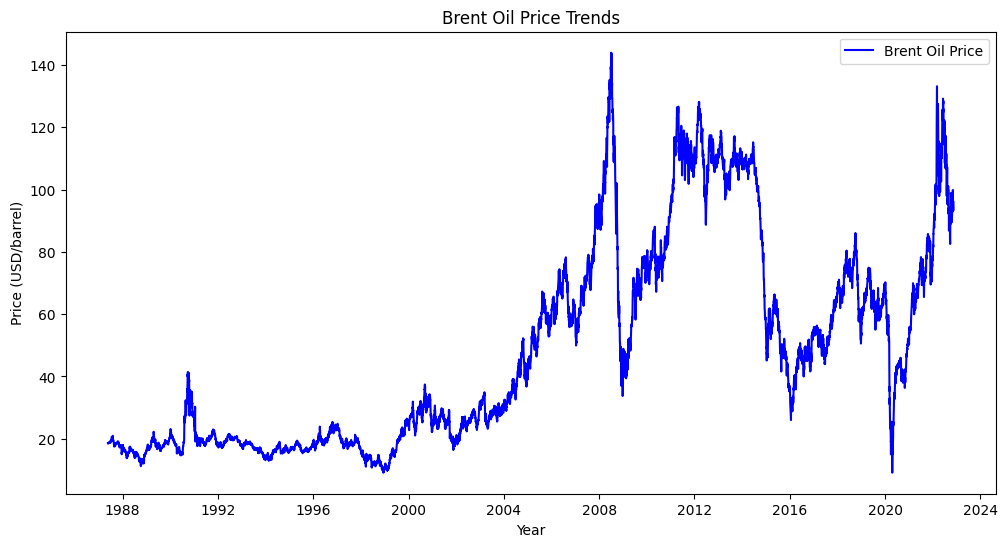

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Brent Oil Price", color="blue")
plt.xlabel("Year")
plt.ylabel("Price (USD/barrel)")
plt.title("Brent Oil Price Trends")
plt.legend()
plt.show()

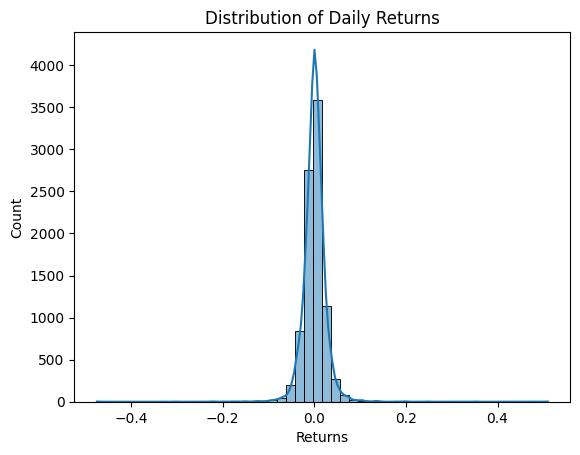

In [5]:
sns.histplot(df["Returns"].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()

In [12]:
df_macro = df_macro.rename(columns={"date":"Date"})
merged_df = df.merge(df_macro, on="Date")
merged_df

,Date,Price,Returns,realtime_start,realtime_end,value
0,1987-06-01,18.65,0.003767,2025-02-12,2025-02-12,113.500
1,1987-07-01,18.98,-0.005241,2025-02-12,2025-02-12,113.800
2,1987-09-01,18.43,-0.010735,2025-02-12,2025-02-12,115.000
3,1987-10-01,18.50,0.001082,2025-02-12,2025-02-12,115.300
4,1987-12-01,17.65,-0.002825,2025-02-12,2025-02-12,115.400
...,...,...,...,...,...,...
269,2022-06-01,122.20,-0.026528,2025-02-12,2025-02-12,296.311
270,2022-07-01,119.21,-0.004759,2025-02-12,2025-02-12,296.276
271,2022-08-01,106.09,-0.048606,2025-02-12,2025-02-12,296.171
272,2022-09-01,92.24,-0.044640,2025-02-12,2025-02-12,296.808


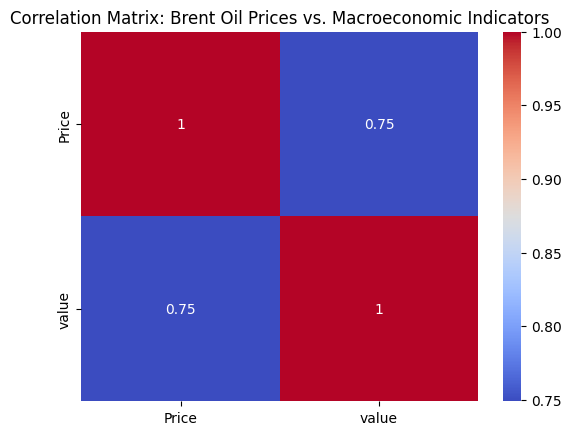

In [14]:
corr_matrix = merged_df[["Price", "value"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix: Brent Oil Prices vs. Macroeconomic Indicators")
plt.show()

In [16]:
merged_df.to_csv("../data/merged_data.csv", index=False)